# Multi Linear Regression on 'Cars.csv' data.

In [2]:
# Multilinear Regression
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [7]:
cars=pd.read_csv('E://Machine Learning Python Codes//Python Codes//Multilinear Regression//Cars.csv')

In [12]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [13]:
cars.corr() #CORRELATION b/w variables to check multi collinearity

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


## We see there exists High collinearity between input variables especially between
## [Hp & SP] , [VOL,WT] so there exists collinearity problem

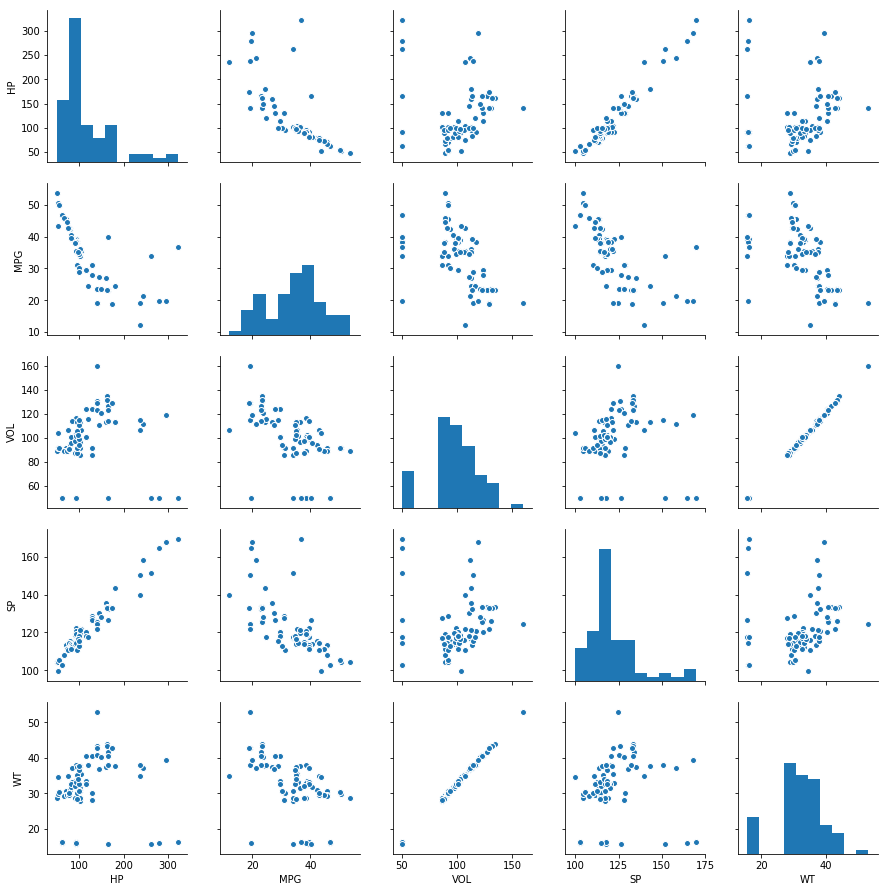

In [15]:
# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(cars)

## 1) Preparing model considering all the variables .

In [20]:

import statsmodels.formula.api as smf # for regression model
         
# Preparing model                  
ml1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit() # regression model

#### coefficients of variables in the above model

In [21]:
ml1.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

### Summary

In [22]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.54e-23
Time:                        19:24:23   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# We see that p-values for WT,VOL are more than 0.05 and also we know that [WT,VOL] has high correlation value 

### Therefore WT & VOL needs to be nurtured or engineered to get the better of the output.

In [23]:
# preparing model based only on Volume
ml_v=smf.ols('MPG~VOL',data = cars).fit()  
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           3.82e-07
Time:                        19:27:39   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# p-value <0.05 .. It is significant 

In [24]:
# Preparing model based only on WT
ml_w=smf.ols('MPG~WT',data = cars).fit()  
ml_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           4.38e-07
Time:                        19:28:50   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Preparing model based only on WT & VOL
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()  
ml_wv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           2.43e-06
Time:                        19:29:20   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Both coefficient's p-value became insignificant... 
### So there may be a chance of considering only one among VOL & WT

# Next we need to check whether data has any influential values.
## influence index plots

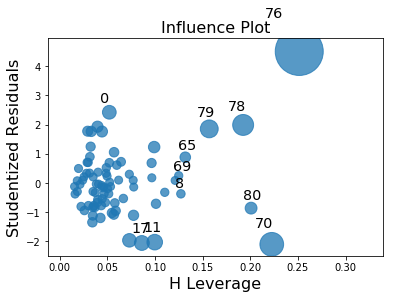

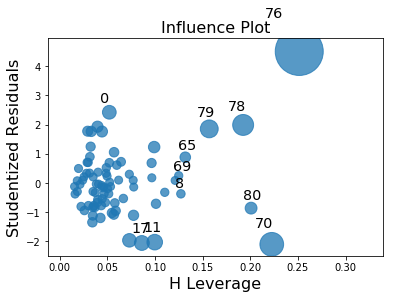

In [29]:
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)

# index 76 AND 78 is showing high influence so we can exclude that entire row

In [32]:
cars_new=cars.drop(cars.index[[76,78]],axis=0)
# X => A B C D 
# X.drop(["A","B"],axis=1) # Dropping columns 
# X.drop(X.index[[5,9,19]],axis=0)

In [33]:
cars_new

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
5,70,45.696322,89,113.185353,29.591768
6,55,50.013401,92,105.461264,30.308480
7,62,46.716554,50,102.598513,15.847758
8,62,46.716554,50,102.598513,16.359484
9,80,42.299078,94,115.645204,30.920154


# 76 , 78 have been removed

## 2)Model with 'cars_new' data

In [34]:
ml_new = smf.ols('MPG~WT+VOL+HP+SP',data = cars_new).fit()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.76e-29
Time:                        20:40:03   Log-Likelihood:                -212.89
No. Observations:                  79   AIC:                             435.8
Df Residuals:                      74   BIC:                             447.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3964     12.506      1.551      0.125      -5.521      44.314
WT             0.4190      1.402      0.299      0.766      -2.375       3.213
VOL           -0.2876      0.471     -0.611      0.543      -1.226       0.650
HP            -0.2589      0.034     -7.671      0.000      -0.326      -0.192
SP             0.4916      0.132      3.717      0.000       0.228       0.755
==============================================================================
Omnibus:                       14.158   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.671
Skew:                           0.945   Prob(JB):                     0.000395
Kurtosis:                       4.091   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# Getting coefficients of variables        
ml_new.params

Intercept    19.396441
WT            0.419045
VOL          -0.287606
HP           -0.258860
SP            0.491610
dtype: float64

In [36]:
# Summary
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.76e-29
Time:                        20:40:51   Log-Likelihood:                -212.89
No. Observations:                  79   AIC:                             435.8
Df Residuals:                      74   BIC:                             447.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3964     12.506      1.551      0.125      -5.521      44.314
WT             0.4190      1.402      0.299      0.766      -2.375       3.213
VOL           -0.2876      0.471     -0.611      0.543      -1.226       0.650
HP            -0.2589      0.034     -7.671      0.000      -0.326      -0.192
SP             0.4916      0.132      3.717      0.000       0.228       0.755
==============================================================================
Omnibus:                       14.158   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.671
Skew:                           0.945   Prob(JB):                     0.000395
Kurtosis:                       4.091   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
print(ml_new.conf_int(0.01)) # 99% confidence level

                   0          1
Intercept -13.667236  52.460118
WT         -3.288049   4.126140
VOL        -1.532122   0.956909
HP         -0.348084  -0.169635
SP          0.141894   0.841325


In [38]:
# Predicted values of MPG 
mpg_pred = ml_new.predict(cars_new[['WT','VOL','HP','SP']])
mpg_pred

0     44.386472
1     43.312122
2     43.197624
3     43.431364
4     43.096156
5     43.722591
6     43.245765
7     46.046164
8     46.260600
9     41.461903
10    41.867072
11    45.615035
12    40.886716
13    41.873397
14    42.197530
15    41.968139
16    41.635078
17    45.799661
18    41.800018
19    38.763174
20    39.206998
21    38.585471
22    38.584402
23    40.119289
24    39.861314
25    44.261578
26    37.248480
27    39.420887
28    39.421761
29    36.754917
        ...    
49    32.751953
50    32.649489
51    32.742835
52    30.084960
53    26.560150
54    27.650969
55    29.231721
56    35.023127
57    32.448584
58    34.682126
59    33.036743
60    29.407131
61    28.683153
62    25.628895
63    26.449960
64    25.584909
65    31.125721
66    24.943493
67    23.298441
68    23.806254
69    17.150103
70    20.084205
71    22.666387
72    23.116990
73    20.658730
74    23.823618
75    20.238082
77    14.629498
79     7.890851
80    10.923816
Length: 79, dtype: float

In [39]:
cars_new[["MPG"]]

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
5,45.696322
6,50.013401
7,46.716554
8,46.716554
9,42.299078


# calculating VIF's values of independent variables


In [43]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars_new).fit().rsquared #R-square value is taken.  
vif_hp = 1/(1-rsq_hp) 

In [44]:
vif_hp

16.33242174977343

In [45]:
rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars_new).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

In [46]:
vif_wt

564.9862078239127

In [47]:
rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars_new).fit().rsquared  
vif_vol = 1/(1-rsq_vol)

In [48]:
vif_vol

564.8458302030133

In [49]:
rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars_new).fit().rsquared  
vif_sp = 1/(1-rsq_sp)

In [50]:
vif_sp

16.351218924114963

# Storing vif values in a data frame

In [51]:
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1) 

In [52]:
Vif_frame

,VIF,Variables
0,16.332422,Hp
1,564.986208,WT
2,564.845830,VOL
3,16.351219,SP


# As weight is having higher VIF value, we are not going to include this prediction model


##### VIF Values must be less than 10 so that we get a better model.

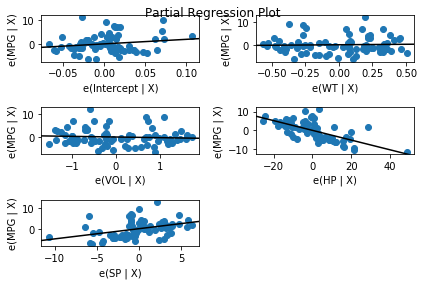

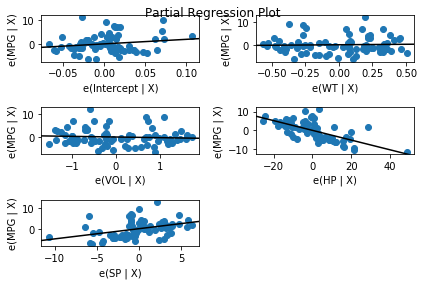

In [53]:
# Added varible plot 
sm.graphics.plot_partregress_grid(ml_new)

#### Flat line not showing any significant inclination from horizontal is considered a bad variable to consider.....In this case it's 'WT'.

# 3)Final Model

In [54]:
final_ml= smf.ols('MPG~VOL+SP+HP',data = cars_new).fit()

In [55]:
final_ml.params

Intercept    18.653898
VOL          -0.147066
SP            0.496420
HP           -0.260050
dtype: float64

In [56]:
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     139.2
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.43e-30
Time:                        21:00:53   Log-Likelihood:                -212.93
No. Observations:                  79   AIC:                             433.9
Df Residuals:                      75   BIC:                             443.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.6539     12.182      1.531      0.130      -5.613      42.921
VOL           -0.1471      0.021     -7.105      0.000      -0.188      -0.106
SP             0.4964      0.130      3.804      0.000       0.236       0.756
HP            -0.2600      0.033     -7.808      0.000      -0.326      -0.194
==============================================================================
Omnibus:                       14.094   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.575
Skew:                           0.942   Prob(JB):                     0.000415
Kurtosis:                       4.086   Cond. No.                     5.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     139.2
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.43e-30
Time:                        21:02:42   Log-Likelihood:                -212.93
No. Observations:                  79   AIC:                             433.9
Df Residuals:                      75   BIC:                             443.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.6539     12.182      1.531      0.130      -5.613      42.921
VOL           -0.1471      0.021     -7.105      0.000      -0.188      -0.106
SP             0.4964      0.130      3.804      0.000       0.236       0.756
HP            -0.2600      0.033     -7.808      0.000      -0.326      -0.194
==============================================================================
Omnibus:                       14.094   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.575
Skew:                           0.942   Prob(JB):                     0.000415
Kurtosis:                       4.086   Cond. No.                     5.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
final_ml.rsquared

0.8477515708382592

# 84.7% is the accuracy of prediction.